Data Dictionary :
------------------

1) index		-	Index No/Row No

2) year_of_poll		-	Year for the conducted poll

3) own_self_emp		-	Business Status( Unemployed - 0 , Business Owned - 1 , Self Employed - 2)

4) veteran benefits	-	Veteran Benefits (0 - No Benefits, 1 - Cadre1 Benefits, 2- Cadre2 Benefits)	

5) currently_enrolled	-	Current enrolled in college/school.

6) race			-	Race of people in the poll

7) father_country	-	Birth country of father 

8) educ			-	Specific education status 

9) house_stat		-	Demography in person's house 

10) major_ind_code	-	Different Industries where a person is working 

11) labour_union	-	Member of Labour Union 

12) self_country	-	Country of oneself

13) major_occ_code	-	Occupation a person performs in specific industry 

14) age			-	age of a person

15) mother_country	-	Birth country of mother 

16) house_summary	-	detailed household summary

17) gender		-	Gender of a person

18) hisp_origin		-	Origins of people in South America

19) gains		-	capital gains on investments

20) dividends		-	dividends earned from stocks 

21) marriage_status	-	Current marital status

22) losses		-   	capital losses on investments

23) employer_of		-	Number of people employed under an employer

24) house_1yr_ago	-	Living in house for under 1 yr

25) income_filled	-	Income filled for tax

26) weeks_worked	-	weeks worked in year

27) under18		-	family members under 18

28) hourly_wage		-	wage earned hourly

29) unemp_reason	- 	reason for unemployment 

30) citizenship		-	Citizenship of a person ( ' Foreign born- Not a citizen of U S ':'FB',
				' Native- Born in Puerto Rico or U S Outlying':'NB_PR',' Native- Born in the United States':'NB_US',
				' Foreign born- U S citizen by naturalization':'FB_US',' Native- Born abroad of American Parent(s)':'NB_US_Parents') 

31) woker_type		-	Kind of worker 

32) fed_liability	-	Federal tax liability for people 

33) full_partime_job	-	type of full/part-time job

34) income		-	Less/More than 50k$ yearly


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas import DataFrame,Series
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')

In [107]:
train=pd.read_csv('/content/drive/MyDrive/train_vok.csv')
test=pd.read_csv('/content/drive/MyDrive/test_vol.csv')

In [108]:
train.shape,test.shape

((105000, 34), (42000, 33))

In [109]:
train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,Protective services,42,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,1,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,NaN,United-States,NaN,10,United-States,Child_U18_Unmarried,M,Mex_Amer,0.0,0.0,Unmarried,0.0,0,NaN,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,NaN,United-States,Machine operators assmblrs & inspctrs,46,United-States,Non_Relative,M,All_Other,0.0,0.0,Divorced,0.0,6,No,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Handlers equip cleaners etc,35,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,2,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Executive admin and managerial,61,United-States,Householder,F,All_Other,0.0,0.0,Divorced,0.0,3,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [110]:
vok=pd.concat([train,test],axis=0,ignore_index=True)

In [111]:
vok.shape

(147000, 34)

In [112]:
vok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147000 entries, 0 to 146999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147000 non-null  int64  
 1   year_of_poll        147000 non-null  int64  
 2   own_self_emp        147000 non-null  int64  
 3   veteran benefits    147000 non-null  int64  
 4   currently_enrolled  102944 non-null  object 
 5   race                147000 non-null  object 
 6   father_country      147000 non-null  object 
 7   educ                147000 non-null  object 
 8   house_stat          146986 non-null  object 
 9   major_ind_code      147000 non-null  object 
 10  labour_union        97332 non-null   object 
 11  self_country        147000 non-null  object 
 12  major_occ_code      72877 non-null   object 
 13  age                 146404 non-null  float64
 14  mother_country      147000 non-null  object 
 15  house_summary       147000 non-nul

In [113]:
vok.isnull().sum()/len(vok)*100

ID                     0.000000
year_of_poll           0.000000
own_self_emp           0.000000
veteran benefits       0.000000
currently_enrolled    29.970068
race                   0.000000
father_country         0.000000
educ                   0.000000
house_stat             0.009524
major_ind_code         0.000000
labour_union          33.787755
self_country           0.000000
major_occ_code        50.423810
age                    0.405442
mother_country         0.000000
house_summary          0.000000
gender                 0.000000
hisp_origin            0.000000
gains                  0.000000
dividends              0.000000
marriage_status        0.000000
losses                 0.000000
employer_of            0.000000
house_1yr_ago         50.829932
income_filled         30.891837
weeks_worked           0.000000
under18               72.351020
hourly_wage            0.000000
unemp_reason          96.956463
citizenship            0.000000
woker_type            50.212245
fed_liab

In [114]:
train['income'].value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

**Univariate Analysis**

In [115]:
len(vok.select_dtypes(exclude=float).columns)

29

In [116]:
for i in vok.select_dtypes(exclude=float).columns:
  print(vok[i].value_counts())


0         1
98002     1
97996     1
97997     1
97998     1
         ..
48994     1
48993     1
48992     1
48991     1
149999    1
Name: ID, Length: 147000, dtype: int64
2005    73613
2004    73387
Name: year_of_poll, dtype: int64
0    133131
2     11890
1      1979
Name: own_self_emp, dtype: int64
2    110712
0     34824
1      1464
Name: veteran benefits, dtype: int64
College/University    59345
 High school          43599
Name: currently_enrolled, dtype: int64
 White                      123330
 Black                       15042
Asian/Pacific_Islander        4269
 Other                        2713
Amer/Indian/Aleut/Eskimo      1646
Name: race, dtype: int64
 United-States                   117270
 Mexico                            7404
 ?                                 4915
 Puerto-Rico                       2007
 Italy                             1638
 Germany                           1018
 Canada                             992
 Dominican-Republic                 947
 Poland    

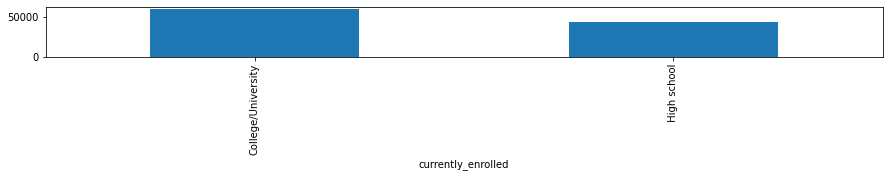

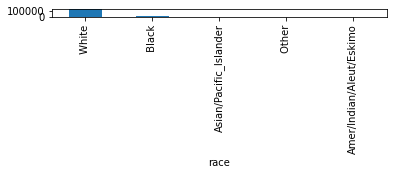

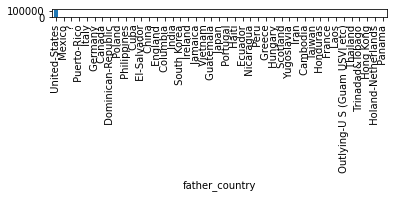

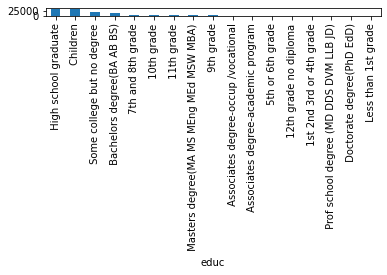

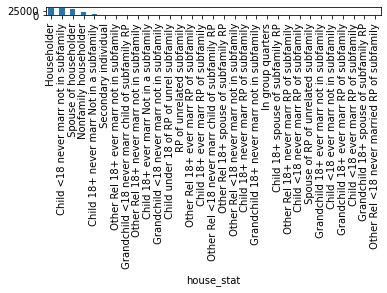

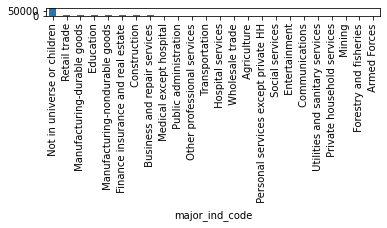

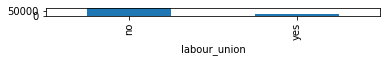

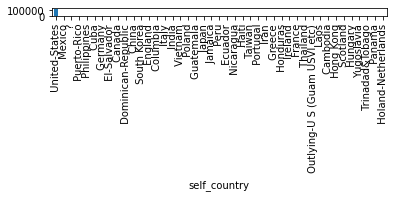

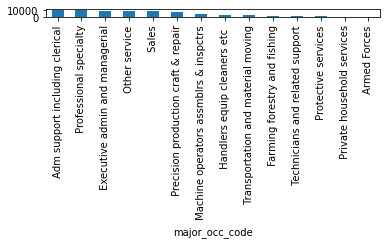

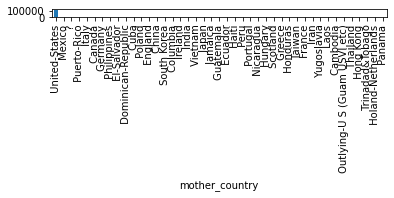

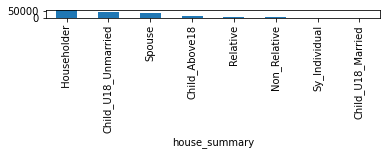

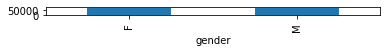

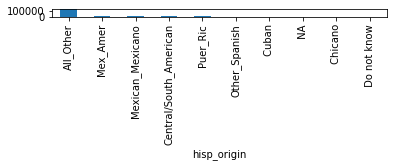

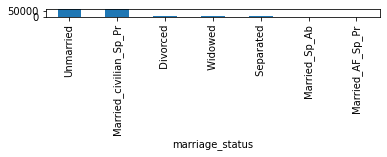

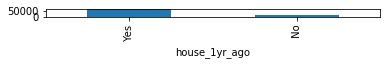

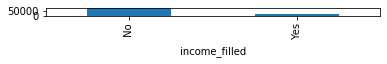

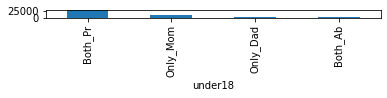

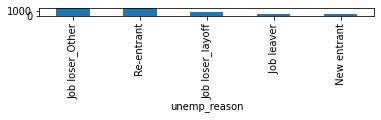

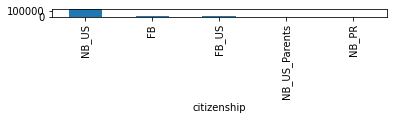

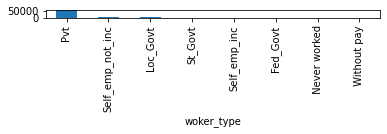

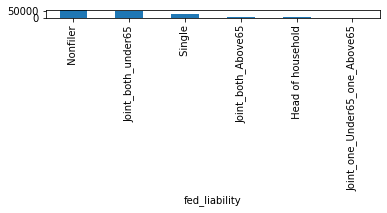

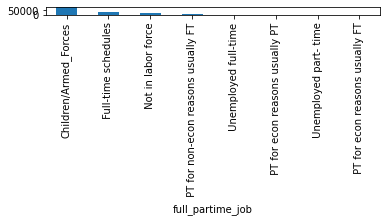

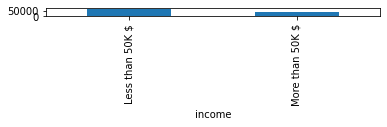

In [117]:
c=1
plt.figure(figsize=[15,25])
for i in vok.select_dtypes(include=object).columns:
  plt.subplot(23,1,c)
  vok[i].value_counts().plot(kind='bar')
  # sns.countplot(vok[i])
  plt.xticks(rotation=90)
  plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()


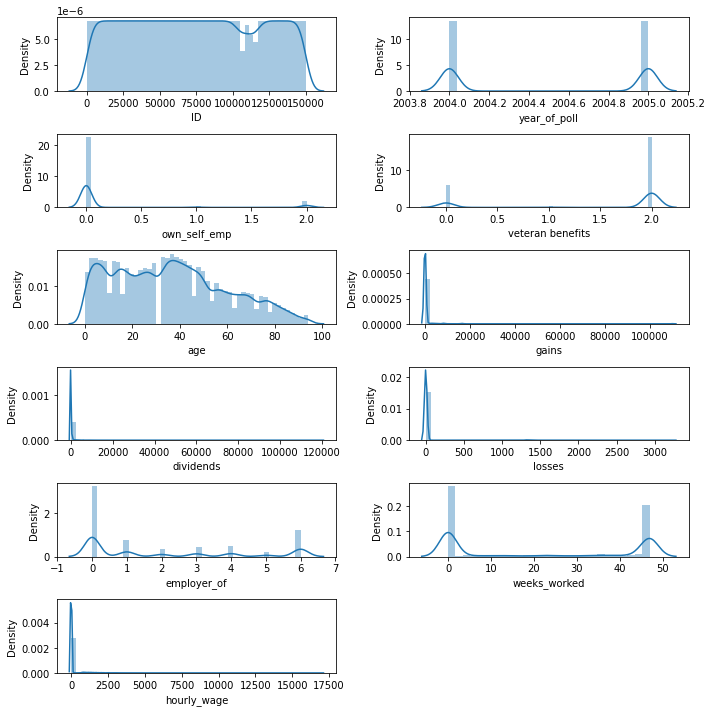

In [118]:
c=1
plt.figure(figsize=[10,10])
for i in vok.select_dtypes(exclude=object).columns:
  plt.subplot(6,2,c)
  # vok[i].value_counts().plot(kind='bar')
  sns.distplot(vok[i])
  # plt.xticks(rotation=90)
  c=c+1
plt.tight_layout()
plt.show()

  

**Bivariate analysis**

In [119]:
len(vok.select_dtypes(include=object).columns[0:-1])

22

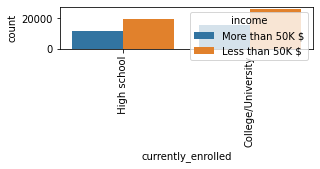

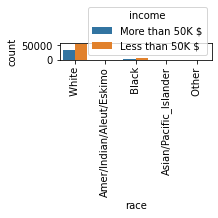

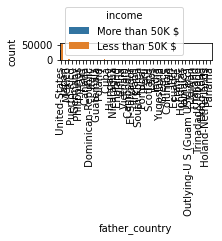

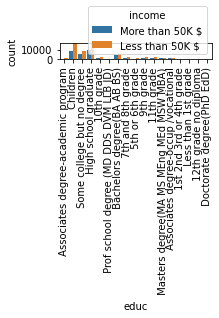

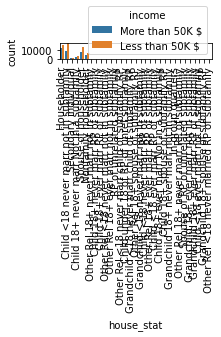

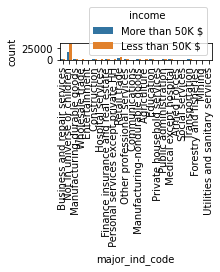

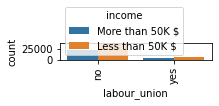

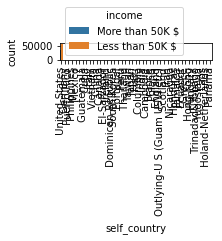

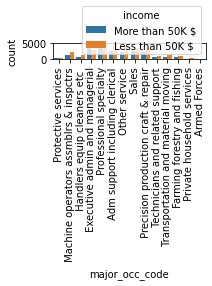

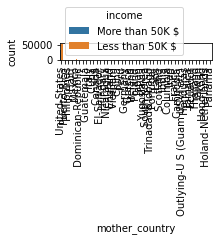

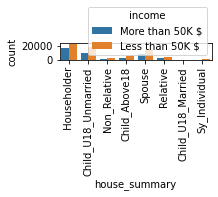

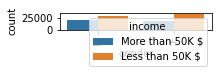

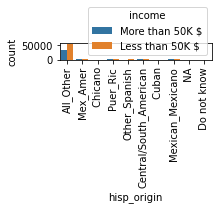

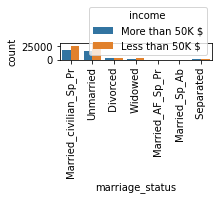

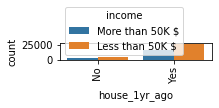

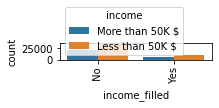

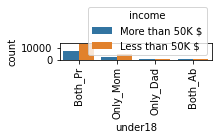

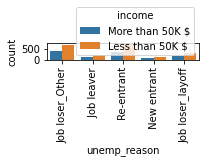

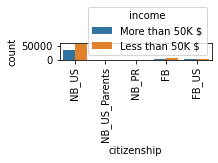

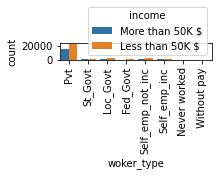

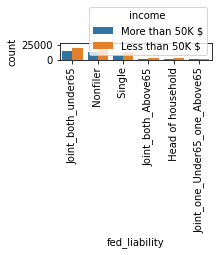

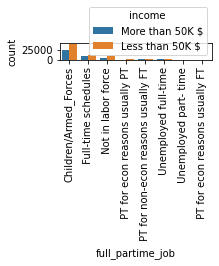

In [120]:
c=1
plt.figure(figsize=[10,10])
for i in vok.select_dtypes(include=object).columns[0:-1]:
    plt.subplot(11,2,c)
    sns.countplot(vok[i],hue=vok['income'])
    plt.xticks(rotation=90)
    c=c+1
    plt.tight_layout()
    plt.show()

<Figure size 1080x1440 with 0 Axes>

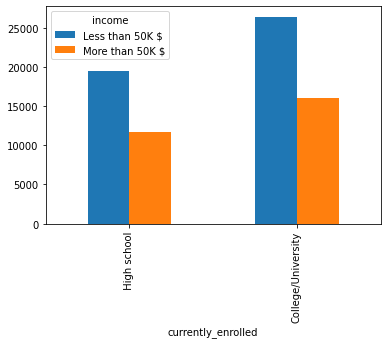

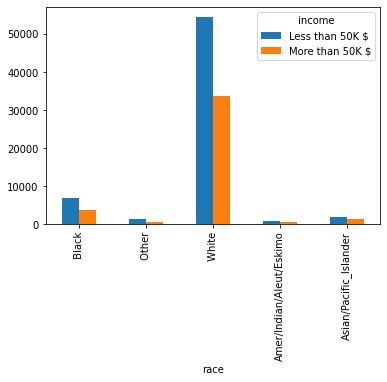

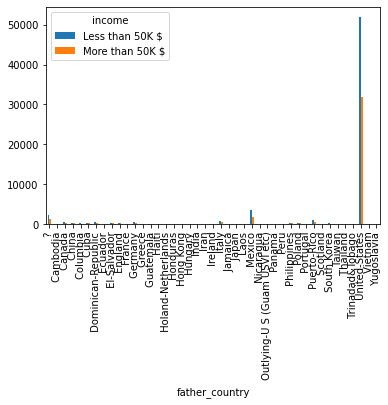

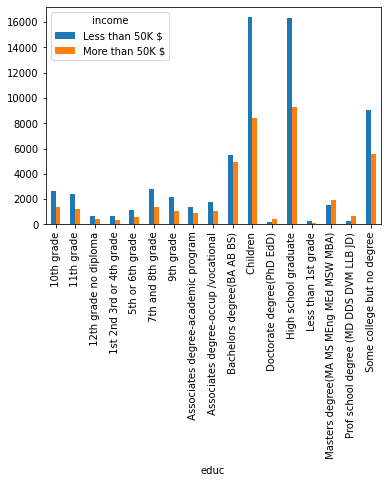

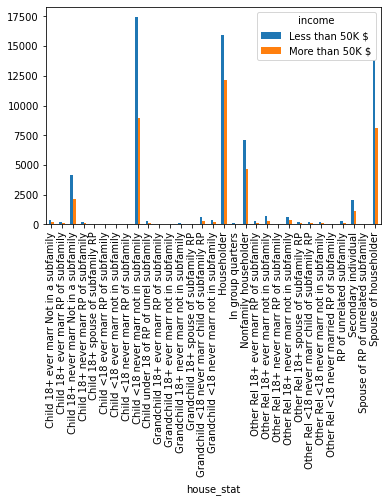

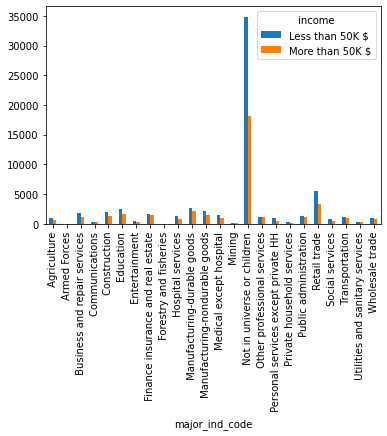

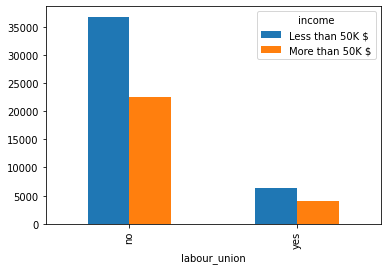

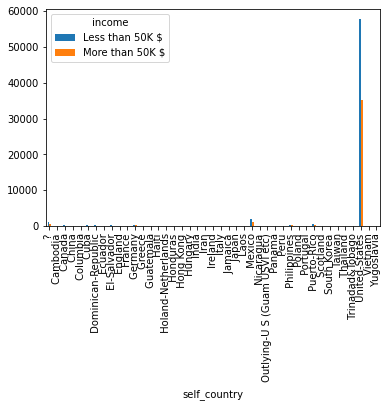

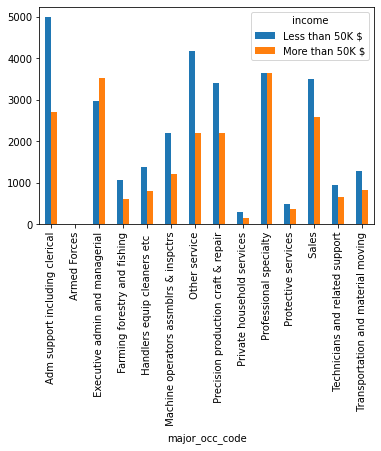

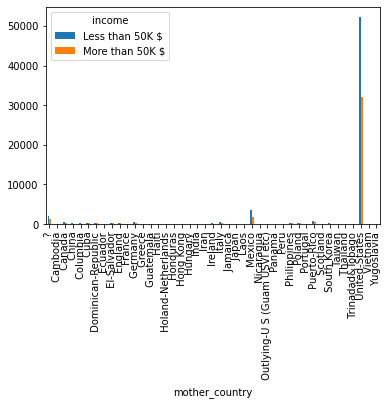

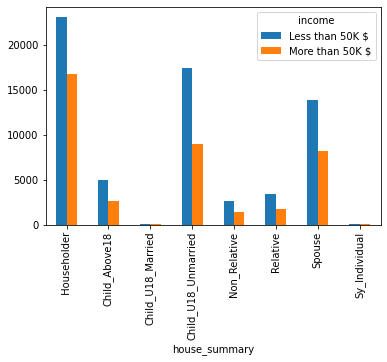

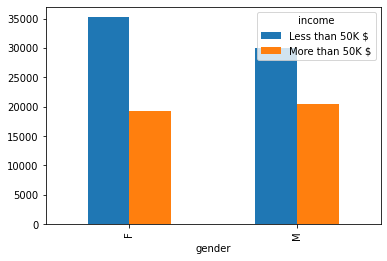

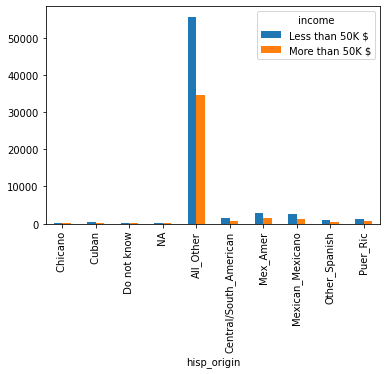

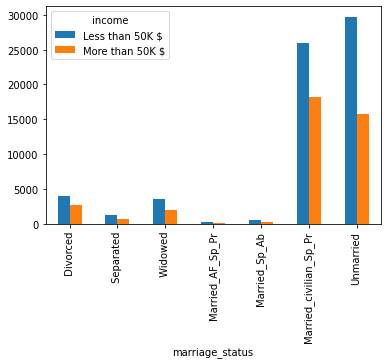

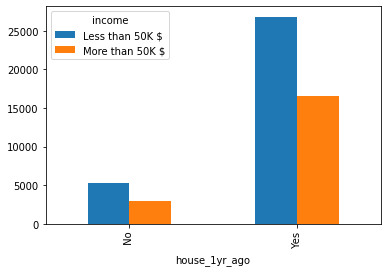

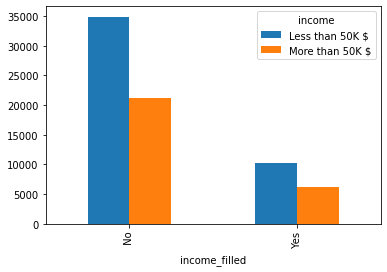

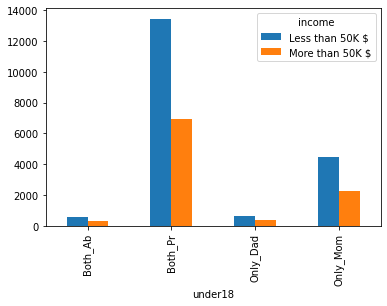

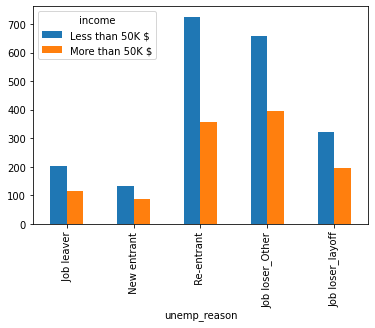

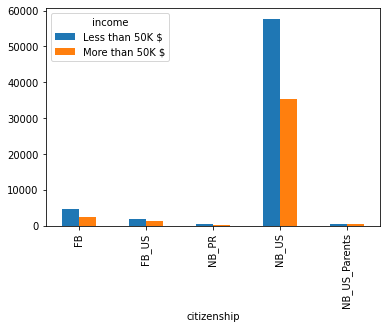

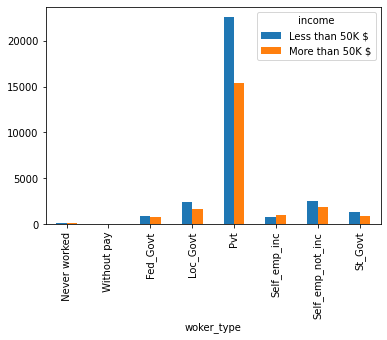

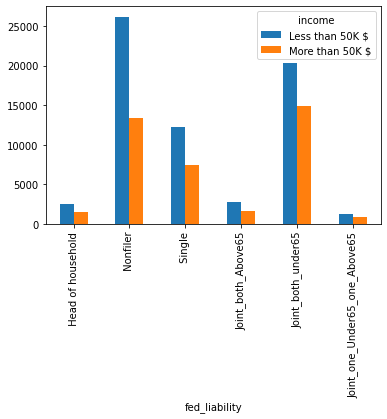

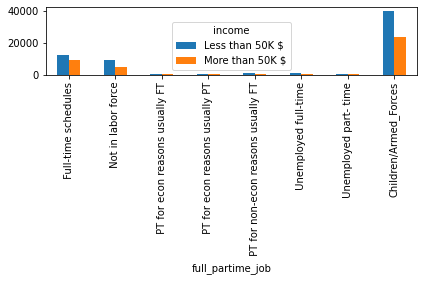

In [121]:
c=1
plt.figure(figsize=[15,20])
for i in vok.select_dtypes(include=object).columns[0:-1]:
  # plt.subplot(22,1,c)
  # vok[i].value_counts().plot(kind='bar')
  pd.crosstab(vok[i],vok['income']).plot(kind='bar')
  # plt.xticks(rotation=90)
  c=c+1
plt.tight_layout()
plt.show()

In [122]:
len(vok.select_dtypes(exclude=object).columns)

11

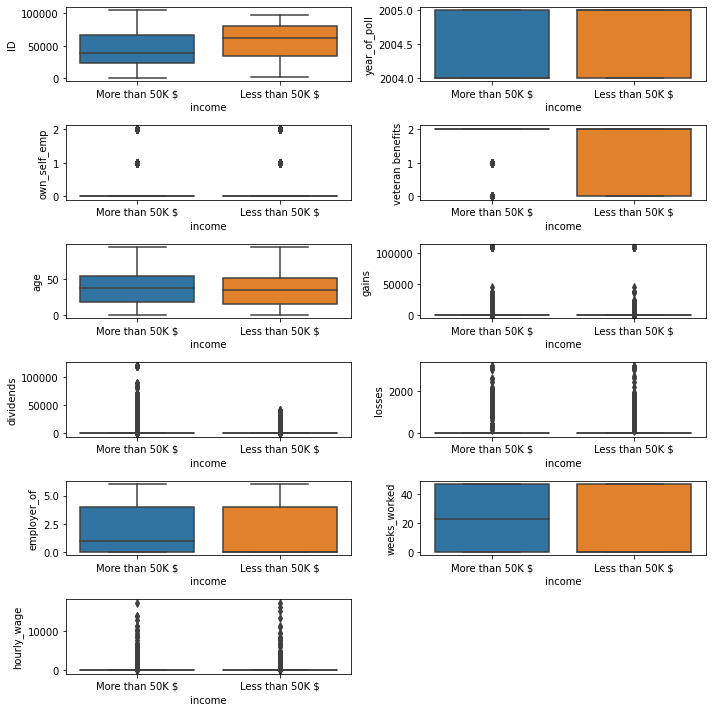

In [123]:
c=1
plt.figure(figsize=[10,10])
for i in vok.select_dtypes(exclude=object).columns:
  plt.subplot(6,2,c)
  # vok[i].value_counts().plot(kind='bar')
  sns.boxplot(vok['income'],vok[i])
  # plt.xticks(rotation=90)
  c=c+1
plt.tight_layout()
plt.show()


**Missing Value Treatment**

In [124]:
mf=(vok.isnull().sum()/len(vok)*100).to_frame()

In [125]:
a=[i for i in mf[mf[0]>60].index]
a

['under18', 'unemp_reason']

In [126]:
vok1=vok.copy()

In [127]:
vok1.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [128]:
vok1.drop(a,axis=1,inplace=True)

In [129]:
vok1.isnull().sum()/len(vok1)*100

ID                     0.000000
year_of_poll           0.000000
own_self_emp           0.000000
veteran benefits       0.000000
currently_enrolled    29.970068
race                   0.000000
father_country         0.000000
educ                   0.000000
house_stat             0.009524
major_ind_code         0.000000
labour_union          33.787755
self_country           0.000000
major_occ_code        50.423810
age                    0.405442
mother_country         0.000000
house_summary          0.000000
gender                 0.000000
hisp_origin            0.000000
gains                  0.000000
dividends              0.000000
marriage_status        0.000000
losses                 0.000000
employer_of            0.000000
house_1yr_ago         50.829932
income_filled         30.891837
weeks_worked           0.000000
hourly_wage            0.000000
citizenship            0.000000
woker_type            50.212245
fed_liability          0.000000
full_partime_job       1.333333
income  

In [130]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['currently_enrolled'].isnull()][i].value_counts())

* No specific category

In [131]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['labour_union'].isnull()][i].value_counts())

In [132]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['major_occ_code'].isnull()][i].value_counts())

In [133]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['house_1yr_ago'].isnull()][i].value_counts())

In [134]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['income_filled'].isnull()][i].value_counts())

In [135]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['woker_type'].isnull()][i].value_counts())

In [136]:
# for i in vok1.select_dtypes(include=object).columns:
#   print(vok1[vok1['full_partime_job'].isnull()][i].value_counts())

**need to replace with median and model**`

In [137]:
for i in vok1.columns[0:-1]:
  if vok1[i].dtype=='object':
    for k in vok1[i].mode():
      vok1[i].fillna(k,inplace=True)
  else:
    vok1[i].fillna(vok[i].median(),inplace=True)

In [138]:
vok1.isnull().sum()

ID                        0
year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled        0
race                      0
father_country            0
educ                      0
house_stat                0
major_ind_code            0
labour_union              0
self_country              0
major_occ_code            0
age                       0
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago             0
income_filled             0
weeks_worked              0
hourly_wage               0
citizenship               0
woker_type                0
fed_liability             0
full_partime_job          0
income                42000
dtype: int64

**Statistical Analysis**

In [139]:
statdf=DataFrame()
f=[]
p=[]
for i in vok.select_dtypes(include=object).columns[0:-1]:
  tstat,pv,df,exp=stats.chi2_contingency(pd.crosstab(vok[i],vok['income']))
  f.append(i)
  p.append(pv)
statdf['feat']=f
statdf['pv']=p

In [140]:
statdf

,feat,pv
0,currently_enrolled,7.186129e-01
1,race,4.654411e-11
2,father_country,1.206961e-05
3,educ,0.000000e+00
4,house_stat,3.059406e-115
5,major_ind_code,7.114120e-174
6,labour_union,2.597011e-01
7,self_country,1.024270e-03
8,major_occ_code,2.699530e-214
9,mother_country,2.150805e-07


In [141]:
for i in vok1.select_dtypes(include=object).columns:
  print(vok1[vok1['full_partime_job'].isnull()][i].value_counts())

Series([], Name: currently_enrolled, dtype: int64)
Series([], Name: race, dtype: int64)
Series([], Name: father_country, dtype: int64)
Series([], Name: educ, dtype: int64)
Series([], Name: house_stat, dtype: int64)
Series([], Name: major_ind_code, dtype: int64)
Series([], Name: labour_union, dtype: int64)
Series([], Name: self_country, dtype: int64)
Series([], Name: major_occ_code, dtype: int64)
Series([], Name: mother_country, dtype: int64)
Series([], Name: house_summary, dtype: int64)
Series([], Name: gender, dtype: int64)
Series([], Name: hisp_origin, dtype: int64)
Series([], Name: marriage_status, dtype: int64)
Series([], Name: house_1yr_ago, dtype: int64)
Series([], Name: income_filled, dtype: int64)
Series([], Name: citizenship, dtype: int64)
Series([], Name: woker_type, dtype: int64)
Series([], Name: fed_liability, dtype: int64)
Series([], Name: full_partime_job, dtype: int64)
Series([], Name: income, dtype: int64)


In [142]:
for i in vok.select_dtypes(exclude=object).columns:
  print(i)
  print(stats.shapiro(vok[i]))

ID
ShapiroResult(statistic=0.9544582366943359, pvalue=0.0)
year_of_poll
ShapiroResult(statistic=0.0314750075340271, pvalue=0.0)
own_self_emp
ShapiroResult(statistic=0.3302949070930481, pvalue=0.0)
veteran benefits
ShapiroResult(statistic=0.538470983505249, pvalue=0.0)
age
ShapiroResult(statistic=nan, pvalue=1.0)
gains
ShapiroResult(statistic=0.06327521800994873, pvalue=0.0)
dividends
ShapiroResult(statistic=0.06794601678848267, pvalue=0.0)
losses
ShapiroResult(statistic=0.11683815717697144, pvalue=0.0)
employer_of
ShapiroResult(statistic=0.7538738250732422, pvalue=0.0)
weeks_worked
ShapiroResult(statistic=0.7009190320968628, pvalue=0.0)
hourly_wage
ShapiroResult(statistic=0.20843815803527832, pvalue=0.0)


**treating age columns**

In [143]:
for i in vok1.select_dtypes(include=object).columns:
  print(vok[vok1['age']==vok1['age'].min()][i].value_counts())


College/University    585
 High school          435
Name: currently_enrolled, dtype: int64
 White                      1214
 Black                       172
 Other                        52
Asian/Pacific_Islander        46
Amer/Indian/Aleut/Eskimo      18
Name: race, dtype: int64
 United-States         1211
 Mexico                 124
 ?                       30
 El-Salvador             15
 Puerto-Rico             15
 Dominican-Republic      10
 Philippines              8
 Cuba                     8
 India                    7
 Columbia                 5
 Germany                  5
 Guatemala                5
 England                  4
 Jamaica                  4
 Taiwan                   3
 China                    3
 Ecuador                  3
 Nicaragua                3
 Canada                   3
 Japan                    3
 Haiti                    3
 Honduras                 3
 France                   3
 Poland                   3
 Cambodia                 3
 South Korea       

In [144]:
vok1[vok1['major_ind_code']==' Not in universe or children']['age'].median()

17.0

In [145]:
vok1['age'].replace([0.0],[17.0],inplace=True)

In [146]:
vok1['age'].min()

1.0

In [147]:
vok1['major_ind_code'].unique()

array([' Business and repair services', ' Not in universe or children',
       ' Manufacturing-durable goods', ' Wholesale trade',
       ' Entertainment', ' Construction', ' Hospital services',
       ' Finance insurance and real estate',
       ' Personal services except private HH', ' Retail trade',
       ' Other professional services', ' Communications',
       ' Manufacturing-nondurable goods', ' Agriculture', ' Education',
       ' Private household services', ' Public administration',
       ' Medical except hospital', ' Armed Forces', ' Social services',
       ' Transportation', ' Forestry and fisheries', ' Mining',
       ' Utilities and sanitary services'], dtype=object)

In [148]:
stats.shapiro(vok1['age'])

ShapiroResult(statistic=0.9640352725982666, pvalue=0.0)

In [149]:
for i in vok.select_dtypes(exclude=object).columns:
  print(i)
  print(stats.shapiro(vok1[i]))

ID
ShapiroResult(statistic=0.9544582366943359, pvalue=0.0)
year_of_poll
ShapiroResult(statistic=0.0314750075340271, pvalue=0.0)
own_self_emp
ShapiroResult(statistic=0.3302949070930481, pvalue=0.0)
veteran benefits
ShapiroResult(statistic=0.538470983505249, pvalue=0.0)
age
ShapiroResult(statistic=0.9640352725982666, pvalue=0.0)
gains
ShapiroResult(statistic=0.06327521800994873, pvalue=0.0)
dividends
ShapiroResult(statistic=0.06794601678848267, pvalue=0.0)
losses
ShapiroResult(statistic=0.11683815717697144, pvalue=0.0)
employer_of
ShapiroResult(statistic=0.7538738250732422, pvalue=0.0)
weeks_worked
ShapiroResult(statistic=0.7009190320968628, pvalue=0.0)
hourly_wage
ShapiroResult(statistic=0.20843815803527832, pvalue=0.0)


In [150]:
statdf1=DataFrame()
p=[]
f=[]
for i in vok.select_dtypes(exclude=object).columns:
  a=vok1[vok1['income']=='More than 50K $'][i]
  b=vok1[vok1['income']=='Less than 50K $'][i]
  t,pv=stats.kruskal(a,b)
  p.append(pv)
  f.append(i)
statdf1['feat']=f
statdf1['p_v']=p
    

In [151]:
statdf1[statdf1['p_v']>0.05]

,feat,p_v
1,year_of_poll,0.507235
10,hourly_wage,0.352326


**Import feat**

In [152]:
vok2=vok1.drop(['year_of_poll','hourly_wage'],axis=1)

In [153]:
vok2.head()

,ID,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,Protective services,42.0,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,1,No,No,47,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,no,United-States,Adm support including clerical,10.0,United-States,Child_U18_Unmarried,M,Mex_Amer,0.0,0.0,Unmarried,0.0,0,Yes,No,0,NB_US,Pvt,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,0,2,College/University,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,no,United-States,Machine operators assmblrs & inspctrs,46.0,United-States,Non_Relative,M,All_Other,0.0,0.0,Divorced,0.0,6,No,Yes,47,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Handlers equip cleaners etc,35.0,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,2,Yes,No,47,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,0,2,College/University,White,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Executive admin and managerial,61.0,United-States,Householder,F,All_Other,0.0,0.0,Divorced,0.0,3,Yes,No,47,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [154]:
vok2['father_country']=vok2['father_country'].str.strip()

In [155]:
vok2['mother_country']=vok2['mother_country'].str.strip()

In [156]:
vok2['self_country']=vok2['self_country'].str.strip()

In [157]:
vok2[vok2['father_country']=='India'].head(1)

,ID,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,citizenship,woker_type,fed_liability,full_partime_job,income
633,633,0,0,College/University,Asian/Pacific_Islander,India,Children,Child <18 never marr not in subfamily,Not in universe or children,no,United-States,Adm support including clerical,17.0,India,Child_U18_Unmarried,M,All_Other,0.0,0.0,Unmarried,0.0,0,Yes,No,0,NB_US,Pvt,Nonfiler,Children/Armed_Forces,More than 50K $


In [158]:
! pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
import pycountry_convert as pc

In [160]:
# a=pc.country_name_to_country_alpha2('China')

In [161]:
# b=pc.country_alpha2_to_continent_code(a)

In [162]:
# pc.convert_continent_code_to_continent_name(b)

In [163]:
a=vok2[vok2['mother_country']=='?'].index
for i in vok2['mother_country'].mode():
  k=i
vok2.loc[a,'mother_country']=k

In [164]:
vok2['self_country'].unique()

array(['United-States', 'Germany', 'Puerto-Rico', 'Philippines', 'Mexico',
       '?', 'Guatemala', 'Cuba', 'Italy', 'Vietnam', 'China', 'Canada',
       'El-Salvador', 'Ireland', 'Dominican-Republic', 'South Korea',
       'Portugal', 'Peru', 'Thailand', 'Taiwan', 'Japan', 'Haiti',
       'Columbia', 'India', 'Cambodia', 'France', 'Poland', 'England',
       'Outlying-U S (Guam USVI etc)', 'Scotland', 'Iran', 'Nicaragua',
       'Honduras', 'Jamaica', 'Ecuador', 'Greece', 'Hong Kong', 'Hungary',
       'Trinadad&Tobago', 'Yugoslavia', 'Laos', 'Holand-Netherlands',
       'Panama'], dtype=object)

In [165]:
a=vok2[vok2['father_country']=='?'].index
for i in vok2['father_country'].mode():
  k=i
vok2.loc[a,'father_country']=k

In [166]:
a=vok2[vok2['self_country']=='?'].index
for i in vok2['self_country'].mode():
  k=i
vok2.loc[a,'self_country']=k

In [167]:
def con(x):
  a=pc.country_name_to_country_alpha2(x)
  b=pc.country_alpha2_to_continent_code(a)
  c=pc.convert_continent_code_to_continent_name(b)
  return c

In [168]:
con('Japan')

'Asia'

In [169]:
b=[]
c=[]
for i in vok2['father_country'].unique():
  try:
    b.append(con(i))
  except:
    c.append(i)
b=list(set(b))
c=list(set(c))   

In [170]:
c

['United-States',
 'Holand-Netherlands',
 'Scotland',
 'Yugoslavia',
 'England',
 'Trinadad&Tobago',
 'Dominican-Republic',
 'Columbia',
 'Outlying-U S (Guam USVI etc)',
 'Puerto-Rico',
 'El-Salvador']

In [171]:
vok2['father_country']=vok2['father_country'].apply(lambda x: x if x in c else con(x))

In [172]:
vok2['self_country']=vok2['self_country'].apply(lambda x: x if x in c else con(x))

In [173]:
vok2['mother_country']=vok2['mother_country'].apply(lambda x: x if x in c else con(x))

In [174]:
vok2['mother_country'].unique()

array(['United-States', 'Puerto-Rico', 'Asia', 'North America',
       'Dominican-Republic', 'Europe', 'El-Salvador', 'England',
       'South America', 'Yugoslavia', 'Trinadad&Tobago', 'Scotland',
       'Columbia', 'Outlying-U S (Guam USVI etc)', 'Holand-Netherlands'],
      dtype=object)

In [175]:
n=['United-States','Puerto-Rico','Dominican-Republic','El-Salvador','Outlying-U S (Guam USVI etc)','Outlying-U S (Guam USVI etc)','Trinadad&Tobago']
e=['England','Yugoslavia','Scotland','Holand-Netherlands']
s=['Columbia']

In [176]:
vok2['father_country']=vok2['father_country'].apply(lambda x: 'North America' if x in n else 'Europe' if x in e else 'South America' if x in s else x)

In [177]:
vok2['self_country']=vok2['self_country'].apply(lambda x: 'North America' if x in n else 'Europe' if x in e else 'South America' if x in s else x)

In [178]:
vok2['mother_country']=vok2['mother_country'].apply(lambda x: 'North America' if x in n else 'Europe' if x in e else 'South America' if x in s else x)

In [179]:
vok2['father_country'].value_counts()

North America    136638
Europe             5767
Asia               3643
South America       952
Name: father_country, dtype: int64

In [180]:
vok2.isnull().sum()

ID                        0
own_self_emp              0
veteran benefits          0
currently_enrolled        0
race                      0
father_country            0
educ                      0
house_stat                0
major_ind_code            0
labour_union              0
self_country              0
major_occ_code            0
age                       0
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago             0
income_filled             0
weeks_worked              0
citizenship               0
woker_type                0
fed_liability             0
full_partime_job          0
income                42000
dtype: int64

In [181]:
vok2.select_dtypes(include=object).columns

Index(['currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'marriage_status', 'house_1yr_ago', 'income_filled', 'citizenship',
       'woker_type', 'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [182]:
vok2['currently_enrolled']=vok2['currently_enrolled'].map(dict(zip(vok2.currently_enrolled.unique(),[0,1])))

In [183]:
vok2['educ']=vok2['educ'].map(dict(zip(vok2['educ'].unique(),[12,0,10,9,6,14,13,4,3,5,7,15,11,2,1,8,16])))

In [184]:
vok2['major_ind_code']=vok2['major_ind_code'].map(dict(vok2['major_ind_code'].value_counts()/len(vok2)))

In [185]:
vok2['major_occ_code']=vok2['major_occ_code'].map(dict(vok2['major_occ_code'].value_counts()/len(vok2)))

In [186]:
vok2['house_summary']=vok2['house_summary'].map(dict(vok2['house_summary'].value_counts()/len(vok2)))

In [187]:
vok2['house_stat']=vok2['house_stat'].map(dict(vok2['house_stat'].value_counts()/len(vok2)))

In [188]:
np.all(vok2['major_occ_code']==vok2['major_ind_code'])

False

In [189]:
for i in vok2.select_dtypes(include=object).columns:
  print(vok2[i].value_counts())

 White                      123330
 Black                       15042
Asian/Pacific_Islander        4269
 Other                        2713
Amer/Indian/Aleut/Eskimo      1646
Name: race, dtype: int64
North America    136638
Europe             5767
Asia               3643
South America       952
Name: father_country, dtype: int64
no     132359
yes     14641
Name: labour_union, dtype: int64
North America    141427
Asia               2736
Europe             2137
South America       700
Name: self_country, dtype: int64
North America    136863
Europe             5434
Asia               3727
South America       976
Name: mother_country, dtype: int64
F    76400
M    70600
Name: gender, dtype: int64
All_Other                 126503
Mex_Amer                    5982
Mexican_Mexicano            5358
Central/South_American      2929
Puer_Ric                    2451
Other_Spanish               1867
 Cuban                       822
 NA                          648
 Chicano                     221
 D

In [190]:
vok2['woker_type']=vok2['woker_type'].map(dict(zip(vok2['woker_type'].unique(),[4,7,5,6,2,3,0,1])))

In [191]:
vok2['full_partime_job']=vok2['full_partime_job'].map(dict(vok2['full_partime_job'].value_counts()/len(vok2)))

In [192]:
vok2['hisp_origin']=vok2['hisp_origin'].map(dict(vok2['hisp_origin'].value_counts()/len(vok2)))

In [193]:
dum=pd.get_dummies(vok2,drop_first=True)

In [194]:
a=list(vok2[vok2['income'].isnull()].index)


In [195]:
set(list(dum.loc[a,'income_More than 50K $']))

{0}

In [196]:
dum.head(-5)

,ID,own_self_emp,veteran benefits,currently_enrolled,educ,house_stat,major_ind_code,major_occ_code,age,house_summary,hisp_origin,gains,dividends,losses,employer_of,weeks_worked,woker_type,full_partime_job,race_ Other,race_ White,race_Amer/Indian/Aleut/Eskimo,race_Asian/Pacific_Islander,father_country_Europe,father_country_North America,father_country_South America,labour_union_yes,self_country_Europe,self_country_North America,self_country_South America,mother_country_Europe,mother_country_North America,mother_country_South America,gender_M,marriage_status_ Separated,marriage_status_ Widowed,marriage_status_Married_AF_Sp_Pr,marriage_status_Married_Sp_Ab,marriage_status_Married_civilian_Sp_Pr,marriage_status_Unmarried,house_1yr_ago_ Yes,income_filled_ Yes,citizenship_FB_US,citizenship_NB_PR,citizenship_NB_US,citizenship_NB_US_Parents,fed_liability_ Nonfiler,fed_liability_ Single,fed_liability_Joint_both_Above65,fed_liability_Joint_both_under65,fed_liability_Joint_one_Under65_one_Above65,income_More than 50K $
0,0,0,2,0,12,0.267116,0.028327,0.008265,42.0,0.378714,0.860565,0.0,0.0,0.0,1,47,4,0.624401,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,0,0,1,0,0.251639,0.504238,0.578211,10.0,0.252150,0.040694,0.0,0.0,0.0,0,0,4,0.624401,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
2,2,0,2,1,10,0.030497,0.045755,0.032558,46.0,0.038061,0.860565,0.0,0.0,0.0,6,47,4,0.624401,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,3,0,2,1,9,0.267116,0.017980,0.020939,35.0,0.378714,0.860565,0.0,0.0,0.0,2,47,4,0.624401,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,4,0,2,1,9,0.267116,0.017980,0.062939,61.0,0.378714,0.860565,0.0,0.0,0.0,3,47,4,0.624401,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146990,149990,2,2,1,13,0.003449,0.004803,0.003993,69.0,0.048374,0.860565,0.0,0.0,0.0,1,47,4,0.624401,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
146991,149991,0,2,1,12,0.267116,0.020946,0.578211,49.0,0.378714,0.860565,0.0,1080.0,0.0,6,47,6,0.624401,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0
146992,149992,0,2,1,9,0.111619,0.020946,0.060061,29.0,0.378714,0.860565,0.0,0.0,0.0,1,47,4,0.201796,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
146993,149993,0,2,1,9,0.208925,0.504238,0.578211,42.0,0.208993,0.860565,0.0,0.0,0.0,6,7,4,0.624401,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


In [197]:
dum.isnull().sum()

ID                                             0
own_self_emp                                   0
veteran benefits                               0
currently_enrolled                             0
educ                                           0
house_stat                                     0
major_ind_code                                 0
major_occ_code                                 0
age                                            0
house_summary                                  0
hisp_origin                                    0
gains                                          0
dividends                                      0
losses                                         0
employer_of                                    0
weeks_worked                                   0
woker_type                                     0
full_partime_job                               0
race_ Other                                    0
race_ White                                    0
race_Amer/Indian/Ale

In [198]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled=mms.fit_transform(dum)

In [199]:
scaled_df=DataFrame(scaled,columns=dum.columns)

In [200]:
scaled_df.isnull().sum()

ID                                             0
own_self_emp                                   0
veteran benefits                               0
currently_enrolled                             0
educ                                           0
house_stat                                     0
major_ind_code                                 0
major_occ_code                                 0
age                                            0
house_summary                                  0
hisp_origin                                    0
gains                                          0
dividends                                      0
losses                                         0
employer_of                                    0
weeks_worked                                   0
woker_type                                     0
full_partime_job                               0
race_ Other                                    0
race_ White                                    0
race_Amer/Indian/Ale

In [201]:
set(list(scaled_df.loc[a,'income_More than 50K $']))

{0.0}

**Splitting the dataset**

In [202]:
newtrain=scaled_df.loc[0:train.shape[0]-1,:]
newtest=scaled_df.loc[train.shape[0]:,:]

In [203]:
newtrain.shape,train.shape,newtest.shape,test.shape

((105000, 51), (105000, 34), (42000, 51), (42000, 33))

In [204]:
X=newtrain.drop('income_More than 50K $',axis=1)
y=newtrain['income_More than 50K $']
newtest=newtest.drop('income_More than 50K $',axis=1)

In [205]:
newtrain.shape,train.shape,newtest.shape,test.shape

((105000, 51), (105000, 34), (42000, 50), (42000, 33))

In [206]:
y.value_counts()

0.0    65272
1.0    39728
Name: income_More than 50K $, dtype: int64

In [207]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [208]:
y.value_counts()

1.0    65272
0.0    65272
Name: income_More than 50K $, dtype: int64

NameError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mod1=mn.fit(X,y)

In [ ]:
p=[int(i) for i in mod1.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('MultinomialNBVokes.csv',index=False)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=1)
ldam=lda.fit(X,y)

In [ ]:
ldam.predict(newtest)

In [ ]:
p=[int(i) for i in ldam.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('ldaVokes.csv',index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dtm=dt.fit(X,y)
p=[int(i) for i in dtm.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('dtmVokes.csv',index=False)

In [ ]:
len('')

In [ ]:
DataFrame({'feat':dtm.feature_names_in_,'v':dtm.feature_importances_}).sort_values('v',ascending=False)

In [ ]:
X.drop('ID',axis=True,inplace=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dtm1=dt.fit(X,y)
p=[int(i) for i in dtm1.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('dtm1Vokes.csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rfm=rf.fit(X,y)
p=[int(i) for i in rfm.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('rfmVokes.csv',index=False)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgbm=xgb.fit(X,y)
p=[int(i) for i in xgbm.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('xgbmVokes.csv',index=False)

In [ ]:
p.count(0)

In [ ]:
t=[0 if int(i)==1 else 1 for i in xgbm.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':t})
solution.to_csv('dimagVokes.csv',index=False)

* I think here the 1 means less than 50 and 0 means more than 50

In [215]:
ny=y.apply(lambda x:0 if x==1 else 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rfm2=rf.fit(X,ny)
p=[int(i) for i in rfm2.predict(newtest)]

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('dirfVokes.csv',index=False)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mulm=mn.fit(X,y)
p=[int(i) for i in mulm.predict(newtest)]

In [ ]:
p.count(1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dtm1=dt.fit(X,ny)
p=[int(i) for i in dtm1.predict(newtest)]

In [ ]:
p.count(1)

In [ ]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('dimagdtVokes.csv',index=False)

In [211]:
from  lightgbm import LGBMClassifier

In [216]:
lgb=LGBMClassifier()
lgbm=lgb.fit(X,y)
p=[int(i) for i in lgbm.predict(newtest)]

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbrm=gbr.fit(X,y)
p=[int(i) for i in gbrm.predict(newtest)]

In [223]:
p.count(1)

42000

In [222]:
from sklearn.ensemble import AdaBoostClassifier
gbr=AdaBoostClassifier()
gbrm=gbr.fit(X,y)
p=[int(i) for i in gbrm.predict(newtest)]

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knnm=knn.fit(X,y)
p=[int(i) for i in knnm.predict(newtest)]

In [230]:
p.count(1)

37096

In [229]:
from sklearn.naive_bayes import GaussianNB
gsn=GaussianNB()
gsnm=gsn.fit(X,ny)
p=[int(i) for i in gsnm.predict(newtest)]

In [231]:
solution=DataFrame({'ID':test['ID'],'income':p})
solution.to_csv('naivvok.csv',index=False)